# Kaggle Titanic Competition Data Exploration
## By Tomas Bencomo
This notebook will explore the data from Kaggle's titanic competition. Competitors are tasked with building a predictive model that determines if a passenger surived the sinking of the Titanic in 1912. 

In [29]:
#import libraries
library(dplyr)
library(ggplot2)
options(jupyter.plot_mimetypes = 'image/png')

## Import Data
train_edited.csv comes from the original train.csv provided by Kaggle. train_edited.csv has been cleaned. The `Age` column had 177 missing values. To fix this, we calculated the mean age of the train data (mean age = 29.6991176470588) and was used to fill in missing age values. 2 observations contained missing `Embarked` locations and were scrubbed from the data set. The `Cabin` column contained too many missing values and these values were too difficult to infer so we deleted the `Cabin` variable entirely from our data 

In [30]:
#build data frame with train data
#train_edited.csv comes from the original train.csv file provided
data <- read.csv('datasets/train_edited.csv', stringsAsFactor = TRUE)
head(data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,Q


## Categorical Variables

In [31]:
str(data)

'data.frame':	889 obs. of  11 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 889 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 558 519 628 416 580 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 680 levels "110152","110413",..: 523 596 669 49 472 275 85 395 344 132 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


By looking at the output of `str(data)` we can determine that the variables `Name`, `Sex`, `Ticket`, and `Embarked` are categorical variables

### Embarked
We view the number of survivors by their Embarked location

In [32]:
embarked_survival <- data %>% group_by(Embarked) %>% summarize(percent_survived = mean(Survived))
embarked_survival$Embarked <- c("Cherbourg", "Queenstown", "Southampton")
head(embarked_survival)

Embarked,percent_survived
Cherbourg,0.5535714
Queenstown,0.3896104
Southampton,0.3369565


Next we plot this data.

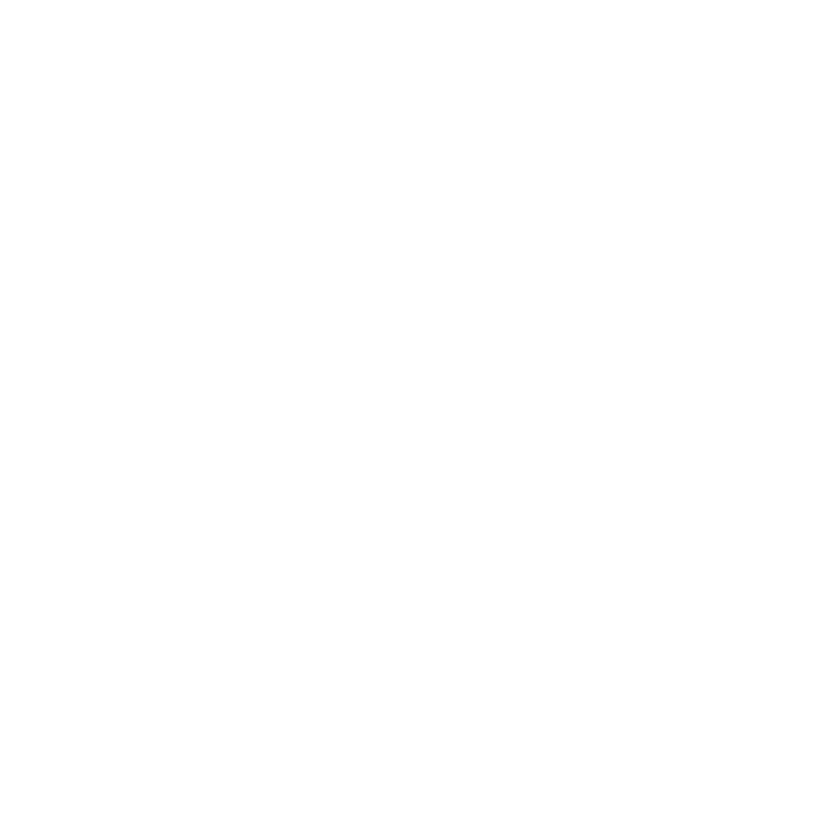

In [40]:
#options(jupyter.plot_mimetypes = 'image/png')
p <- ggplot(embarked_survival, aes(x = Embarked, y = round(survival_percent * 100, digit = 0))) + geom_bar(stat = 'identity', color = 'red', fill = 'red') + labs(x = "City Embarked From", y = "Percent Survived") + ggtitle("Survival Rate by City Embarked") + geom_text(aes(label = round(survival_percent * 100, digits = 0), vjust = 1.6))
p